## Welcome to ZoeDepth Colab notebook

This notebook provides an easy to use interface for the depth estimation model "ZoeDepth".

It accompanies our paper : [ZoeDepth: Zero-shot Transfer by Combining Relative and Metric Depth](https://arxiv.org/abs/2302.12288v1)

# Setup

In [1]:
!pip install --upgrade timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
!git clone https://github.com/isl-org/ZoeDepth.git

Cloning into 'ZoeDepth'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 111 (delta 38), reused 23 (delta 23), pack-reused 42 (from 2)
Receiving objects: 100% (111/111), 4.09 MiB | 3.59 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [6]:
%cd ZoeDepth

[Errno 2] No such file or directory: 'ZoeDepth'
/content/ZoeDepth


Sanity checks, to make sure everything is working

In [4]:
!python sanity.py

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or help(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use help(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.l

In [5]:
# Download file, only works on Chrome
from google.colab import files
files.download("pred.png")

FileNotFoundError: Cannot find file: pred.png

# Load the model

In [7]:
!pip install timm==0.6.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 33.8 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 1.0.15
    Uninstalling timm-1.0.15:
      Successfully uninstalled timm-1.0.15


In [7]:
import torch
from zoedepth.utils.misc import get_image_from_url, colorize
from PIL import Image
import matplotlib.pyplot as plt


zoe = torch.hub.load(".", "ZoeD_N", source="local", pretrained=True)

img_size [384, 512]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt
Loaded successfully


In [8]:
zoe = zoe.to('cuda')

# Prediction

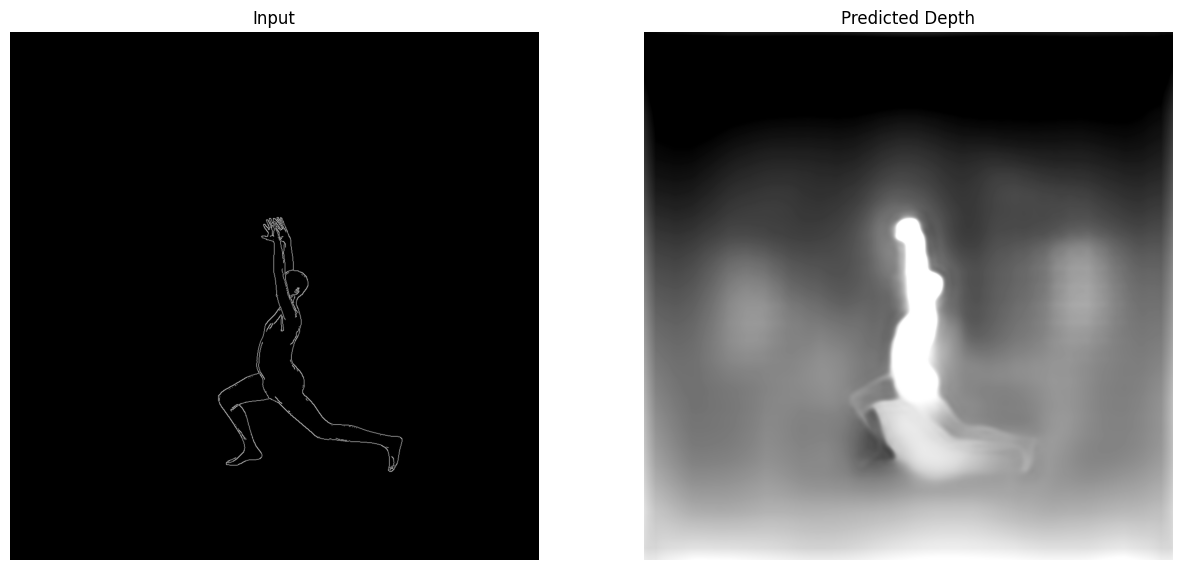

In [10]:
#@title Predicting depth from a url image
from PIL import Image

# 指定本地图片路径
img_path = "/content/ZoeDepth/frame_000223.jpg"

# 读取本地图片
img = Image.open(img_path)

# 转换图像模式为RGB（如果需要）
img = img.convert("RGB")

# 推理深度图
depth = zoe.infer_pil(img)
colored_depth = colorize(depth)
fig, axs = plt.subplots(1,2, figsize=(15,7))
for ax, im, title in zip(axs, [img, colored_depth], ['Input', 'Predicted Depth']):
  ax.imshow(im)
  ax.axis('off')
  ax.set_title(title)